# CS189 HW2
Timothy Quang Nguyen

timotqn2@uci.edu

## Environment Setup

In [7]:
# Task: predict whether an image contains signs of diabetic retinopathy or not. (binary classification)

import numpy as np # for data organization
import pandas as pd # for data organization

import sklearn as sk # for machine learning
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score # For Evaluation
from sklearn.preprocessing import StandardScaler # To Scale Features
from sklearn.model_selection import GridSearchCV # For Hyper Parameter Tuning
from sklearn.linear_model import LogisticRegression # For Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier
from sklearn.svm import SVC # For SVM Classifier

import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

In [4]:
# Use to install UCI data packager
!pip install ucimlrepo
!pip install nbconvert

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetic_retinopathy_debrecen = fetch_ucirepo(id=329) 
  
# data (as pandas dataframes) 
X = diabetic_retinopathy_debrecen.data.features 
y = diabetic_retinopathy_debrecen.data.targets 
  
# metadata 
print(diabetic_retinopathy_debrecen.metadata) 
  
# variable information 
print(diabetic_retinopathy_debrecen.variables) 


{'uci_id': 329, 'name': 'Diabetic Retinopathy Debrecen', 'repository_url': 'https://archive.ics.uci.edu/dataset/329/diabetic+retinopathy+debrecen', 'data_url': 'https://archive.ics.uci.edu/static/public/329/data.csv', 'abstract': 'This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1151, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5XP4P', 'creators': ['Balint Antal', 'Andras Hajdu'], 'intro_paper': {'ID': 226, 'type': 'NATIVE', 'title': 'An ensemble-based system for automatic screening of diabetic retinopathy', 'authors': 'B. Antal, A. Hajdu', 'venue': 

## Function Declarations

In [10]:
# Used to produce confusion matrices and accuracy metrics for models
def confusion_matrix_and_metrics(y_te, y_pred):
    
    # Used to produce a pretty Confusion Matrix
    cm = confusion_matrix(y_te, y_pred, labels=[0, 1])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NO", ">30", "<30"], yticklabels=["NO", ">30", "<30"])
    
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Used to produce metric data, precision, recall, F1 score, accuracy

    print("Precision of the MLP :\t" + str(precision_score(y_te, y_pred, average="macro")))
    print("Recall of the MLP    :\t" + str(recall_score(y_te, y_pred, average="macro")))
    print("F1 Score of the Model :\t" + str(f1_score(y_te, y_pred, average="macro")))
    print("Accuracy Score of the Model :\t" + str(round(accuracy_score(y_te, y_pred) * 100, 2)) + "%")

## Data Exploration

In [11]:
data = pd.concat([X, y], axis = 1) # Combining both the x and y data for exploration

data

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,5.270920,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,3.325423,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,12.687485,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,9.118901,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.410381,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.031145,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,8.067688,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,1.763305,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,4.740919,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [12]:
# General data properties

rows, cols = data.shape
column_names = data.columns.tolist()

print("Number of rows: ", rows)
print("Number of columns: ", cols)
print()
print("All Columns: ", column_names)
print()
print("Column Types: ", data.dtypes)

Number of rows:  1151
Number of columns:  20

All Columns:  ['quality', 'pre_screening', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate3', 'exudate5', 'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter', 'am_fm_classification', 'Class']

Column Types:  quality                        int64
pre_screening                  int64
ma1                            int64
ma2                            int64
ma3                            int64
ma4                            int64
ma5                            int64
ma6                            int64
exudate1                     float64
exudate2                     float64
exudate3                     float64
exudate3                     float64
exudate5                     float64
exudate6                     float64
exudate7                     float64
exudate8                     float64
macula_opticdisc_distance    float64
opticdisc_diameter           float64
am_fm_c

In [13]:
# Display any missing data
data.isnull().sum()

quality                      0
pre_screening                0
ma1                          0
ma2                          0
ma3                          0
ma4                          0
ma5                          0
ma6                          0
exudate1                     0
exudate2                     0
exudate3                     0
exudate3                     0
exudate5                     0
exudate6                     0
exudate7                     0
exudate8                     0
macula_opticdisc_distance    0
opticdisc_diameter           0
am_fm_classification         0
Class                        0
dtype: int64

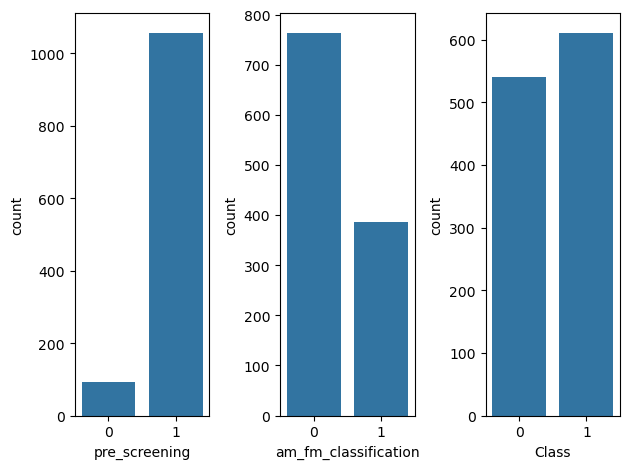

In [14]:
# Display data distribution for binary columns

fig, ax = plt.subplots(1, 3)
sns.countplot(data, x="pre_screening", ax=ax[0])
sns.countplot(data, x="am_fm_classification", ax=ax[1])
sns.countplot(data, x="Class", ax=ax[2])
fig.tight_layout()
plt.show()

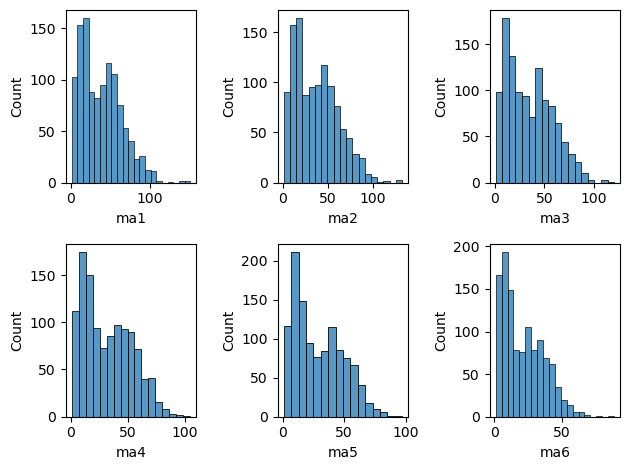

In [15]:
# Display data distribution for large integer columns
large_int_cols = ['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6']
fig, ax = plt.subplots(2, 3)

for index, cols in enumerate(large_int_cols):
    sns.histplot(data, x=cols, ax=ax[int(index / 3)][index % 3])

fig.tight_layout()
plt.show()

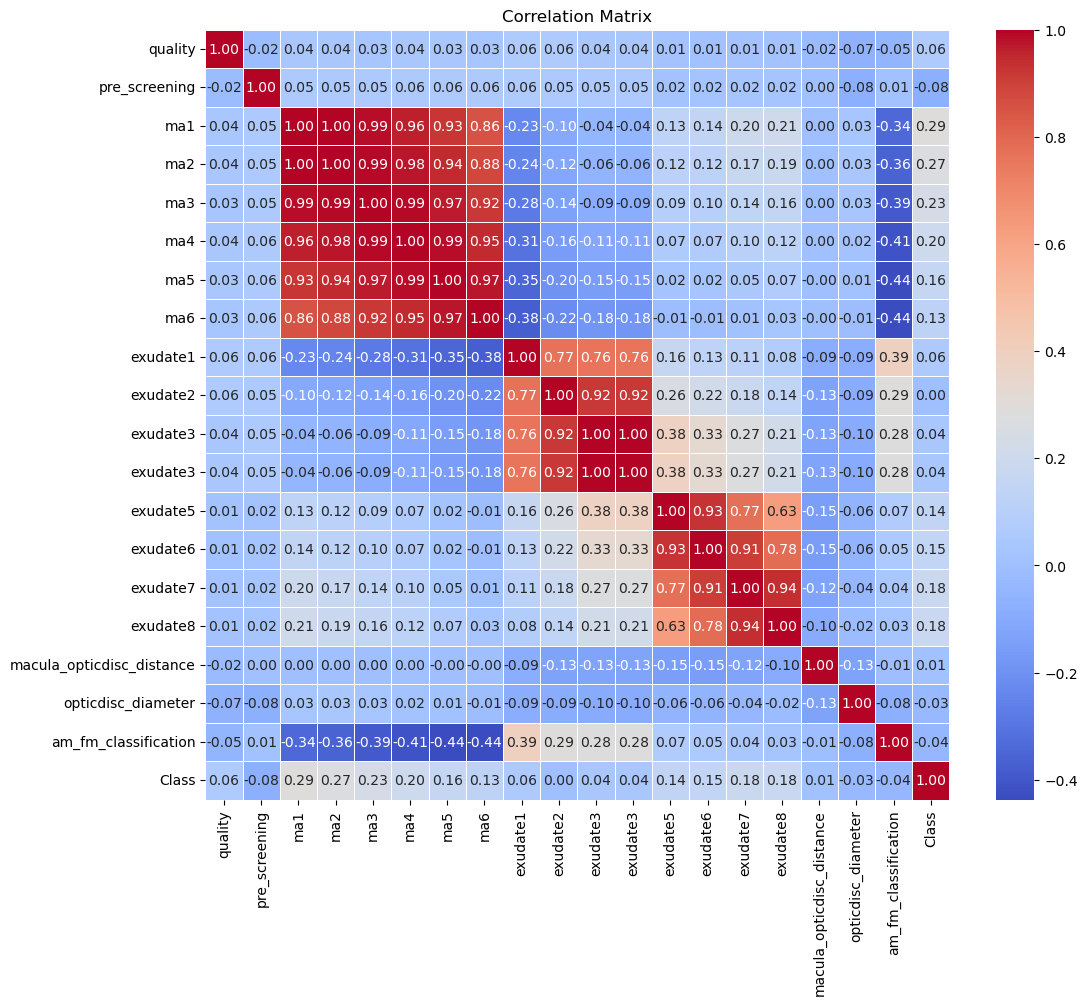

In [16]:
# Correlation heatmap for all columns
corr_matrix = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt="0.2f", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing

### Splitting Data

In [21]:
# Splitting data by ratio of 80% training and 20% test
x_data = data.drop('Class', axis=1)
y_data = data['Class']
x_tr, x_te, y_tr, y_te = sk.model_selection.train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(920, 19)
(231, 19)
(920,)
(231,)


### Scale Features

In [22]:
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr)
x_te_scaled = scaler.fit_transform(x_te)

## Random Forest Classifier

### Random Forest (Default Hyperparameters)

In [23]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_tr, y_tr)
rf_y_pred = rf_model.predict(x_te)

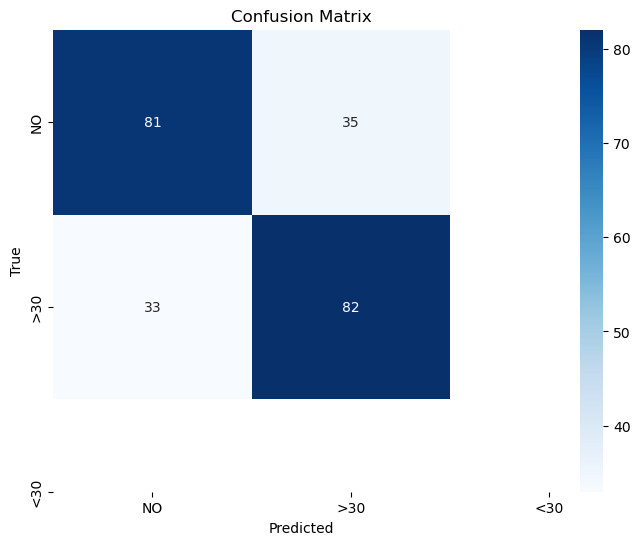

Precision of the MLP :	0.7056905083220872
Recall of the MLP    :	0.7056596701649176
F1 Score of the Model :	0.7056221889055472
Accuracy Score of the Model :	70.56%


In [24]:
# Evaluation of Random Forest Classifier
confusion_matrix_and_metrics(y_te, rf_y_pred)

### Random Forest (Tuned Hyperparameters)

In [25]:
# Create a model and use Grid Search to find best combination of hyperparameters
rf_model_tuned = RandomForestClassifier()
rf_params = {"n_estimators": [50, 100, 300], 
             "max_depth": [3, 5, 7],
             "max_features": [2, 4, 6, 8],
             "min_samples_split": [2, 4, 6]}

rf_model_tuned = GridSearchCV(rf_model_tuned, rf_params, verbose=3)
rf_model_tuned.fit(x_tr, y_tr)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.609 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.609 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.663 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.636 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.668 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.576 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.609 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.663 total time=   0.1s
[CV 4/5] END max_depth=3, max_features

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]},
             verbose=3)

In [26]:
# Random Forest Classifier with Tuned Hyperparameters
rf_model_tuned = RandomForestClassifier(max_depth=7, max_features=8, n_estimators=300)
rf_model_tuned.fit(x_tr, y_tr)
rf_y_pred_tuned = rf_model_tuned.predict(x_te)

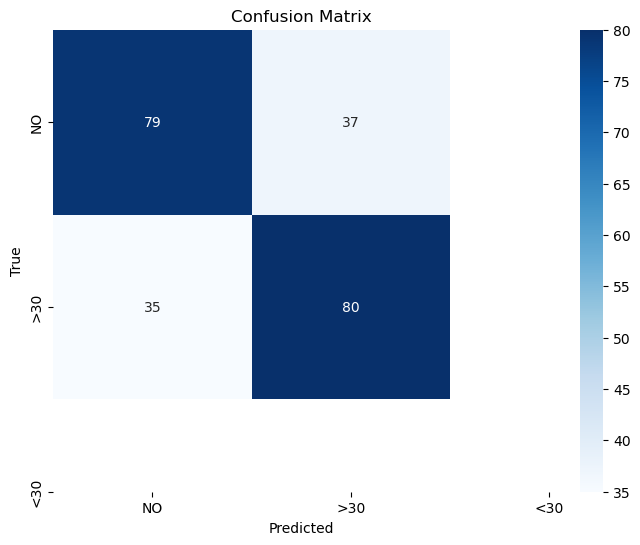

Precision of the MLP :	0.6883715699505173
Recall of the MLP    :	0.688343328335832
F1 Score of the Model :	0.6883058470764618
Accuracy Score of the Model :	68.83%


In [27]:
# Evaluation of Random Forest Classifier with Tuned Hyperparameters
confusion_matrix_and_metrics(y_te, rf_y_pred_tuned)

## Logistic Regression Classifier

### Logistic Regression (Default Hyperparameters / Unscaled Data)

In [28]:
# Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
lr_y_pred = lr_model.predict(x_te)

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


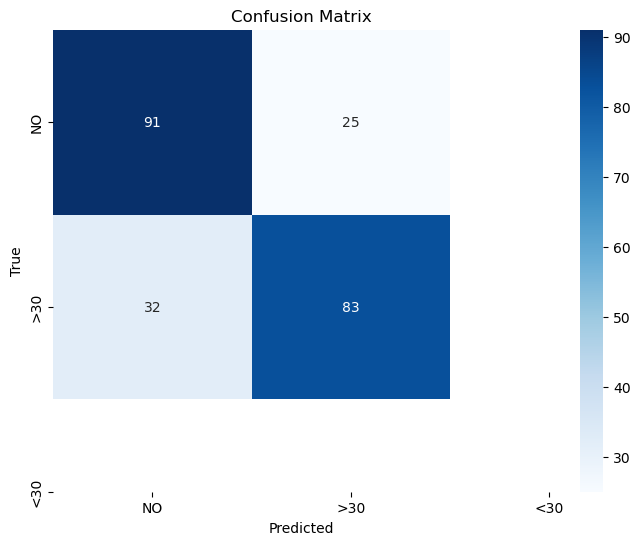

Precision of the MLP :	0.7541779584462511
Recall of the MLP    :	0.7531109445277362
F1 Score of the Model :	0.7529504474923542
Accuracy Score of the Model :	75.32%


In [29]:
# Evaluation of Logistic Regression Classifier
confusion_matrix_and_metrics(y_te, lr_y_pred) 

### Logistic Regression (Default Hyperparameters / Scaled Data)

In [30]:
# Logistic Regression Classifier with Scaled Data
lr_model_scaled = LogisticRegression()
lr_model_scaled.fit(x_tr_scaled, y_tr)
lr_y_pred_scaled = lr_model_scaled.predict(x_te_scaled)

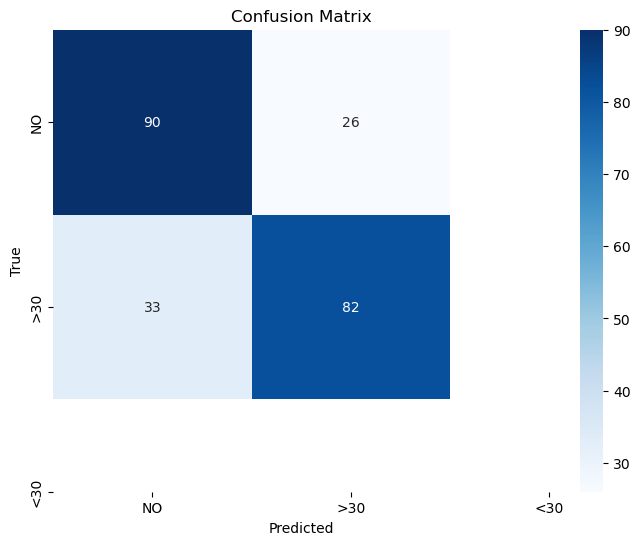

Precision of the MLP :	0.745483288166215
Recall of the MLP    :	0.7444527736131934
F1 Score of the Model :	0.7442820421412086
Accuracy Score of the Model :	74.46%


In [31]:
# Evaluation of Logistic Regression Classifier with Scaled Data
confusion_matrix_and_metrics(y_te, lr_y_pred_scaled) 

### Logistic Regression (Tuned Hyperparameters / Unscaled Data)

In [32]:
# Create a model and use Grid Search to find best combination of hyperparameters
lr_model_tuned = LogisticRegression()
lr_params = {"penalty": ["l1", "l2", "elasticnet", "none"], 
            "C": [0.001, 0.01, 0.1, 1, 10], 
            "solver": ["lbfgs", "liblinear", "sag", "newton-cg", "newton-cg", "newton-cholesky"], 
            "max_iter": [100, 500, 1000, 2000]}

lr_model_tuned = GridSearchCV(lr_model_tuned, lr_params, verbose=3)
lr_model_tuned.fit(x_tr, y_tr)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.543 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.538 total

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.679 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.679 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalt

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.679 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.690 total time=   0.0s
[CV 2/5] END C

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.674 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.685 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.766 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarnin

[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.723 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.679 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.739 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.755 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.701 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, p

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.717 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.783 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.723 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.772 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarnin

[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.723 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, 

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.761 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.734 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.690 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.717 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, 

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=1000, penalty=l2, solver=sag;, score=0.745 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l2, solver=sag;, score=0.712 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=l2, solver=sag;, score=0.788 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=l2, solver=sag;, score=0.723 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l2, solver=sag;, score=0.772 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.761 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.717 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.772 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.734 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.772 total time=   0.2s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarnin

[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.739 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.701 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.728 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.728 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.739 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.734 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.701 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.717 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.761 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.7

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.739 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.3s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.739 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.745 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.723 total time=   0.1s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.793 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.723 total time=   0.1s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.772 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg;

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.755 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.717 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.777 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.728 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.755 total time=   0.3s
[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=newt

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.766 total time=   0.4s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.723 total time=   0.5s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.777 total time=   0.3s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.696 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.772 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.701 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.723 total ti

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solve

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.761 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.728 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.2s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.739 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.701 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.717 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.761 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.4s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.2s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.2s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.745 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.723 total time=   0.1s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.793 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.728 total time=   0.1s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.772 total time=   0.1s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.5s
[CV 2/5] END C=10, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.6s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.7s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.6s
[CV 5/5] END C=10, max_iter=2000, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.4s
[CV 1/5] END C=10, max_iter=2000, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 2/5] END C=10, max_iter=2000, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=2000, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s
[CV 4/5] END C=10, max_iter=2000, penalty=l2, solver=liblinear;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=2000, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=2000, penalty=l2, solver=sag;, score=0.755 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=2000, penalty=l2, solver=sag;, score=0.717 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=2000, penalty=l2, solver=sag;, score=0.783 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=2000, penalty=l2, solver=sag;, score=0.728 total time=   0.3s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=2000, penalty=l2, solver=sag;, score=0.755 total time=   0.3s
[CV 1/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 3/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=10, max_iter=2000, penalty=l2, solver=newton-cg;, score=0.728 total time=   0.0s
[CV 5/5] END C=10, max_iter=2000, penalty=l2, 

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1700 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logis

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'newton-cg',
                                    'newton-cg', 'newton-cholesky']},
             verbose=3)

In [49]:
# Logistic Regression Classifier with Tuned Hyperparameters
lr_model_tuned = LogisticRegression(C=10, max_iter=2000)
lr_model_tuned.fit(x_tr, y_tr)
lr_y_pred_tuned = lr_model_tuned.predict(x_te)

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


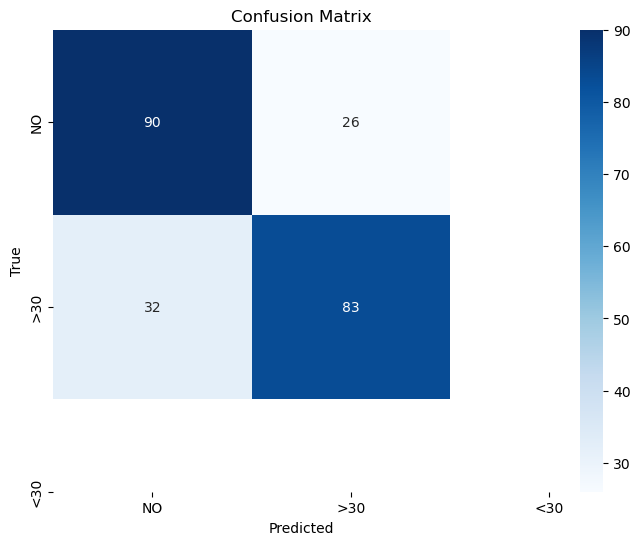

Precision of the MLP :	0.7495864039705219
Recall of the MLP    :	0.7488005997001499
F1 Score of the Model :	0.748686974789916
Accuracy Score of the Model :	74.89%


In [50]:
# Evaluation of Logistic Regression Classifier with Tuned Hyperparameters
confusion_matrix_and_metrics(y_te, lr_y_pred_tuned) 

### Logistic Regression (Tuned Hyperparameters / Scaled Data)

In [35]:
# Create a model and use Grid Search to find best combination of hyperparameters
lr_model_tuned_scaled = LogisticRegression()
lr_params = {"penalty": ["l1", "l2", "elasticnet", "none"], 
            "C": [0.001, 0.01, 0.1, 1, 10], 
            "solver": ["lbfgs", "liblinear", "sag", "newton-cg", "newton-cg", "newton-cholesky"], 
            "max_iter": [100, 500, 1000, 2000]}

lr_model_tuned_scaled = GridSearchCV(lr_model_tuned_scaled, lr_params, verbose=3)
lr_model_tuned_scaled.fit(x_tr_scaled, y_tr)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.457 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.462 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.462 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.462 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear;, score=0.462 total

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=new

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.685 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.690 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.674 total 

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cholesky;, score=0.717 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2,

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.701 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.728 total time=   0.0s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.766 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newt

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.707 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.696 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.755 total time=   0.1s


C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.728 total time=   0.1s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=sag;, score=0.777 total time=   0.1s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.712 total time=   0.0s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 3/5] END C=10, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.755 total time=   0.0s
[CV 4/5] END C=10, max_iter=1000, penalty=l2, solver

C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1700 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\miniconda3\envs\cs189\Lib\site-packages\sklearn\linear_model\_logis

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'newton-cg',
                                    'newton-cg', 'newton-cholesky']},
             verbose=3)

In [36]:
lr_model_tuned_scaled = LogisticRegression(C=10, penalty="l1", solver="liblinear")
lr_model_tuned_scaled.fit(x_tr_scaled, y_tr)
lr_y_pred_tuned_scaled = lr_model_tuned_scaled.predict(x_te_scaled)

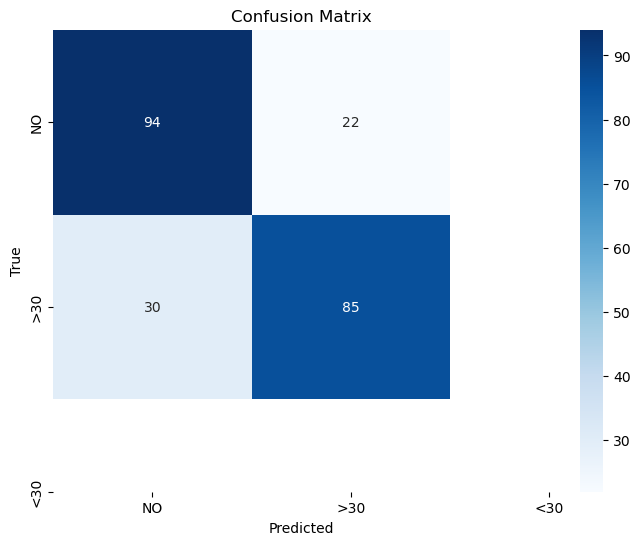

Precision of the MLP :	0.7762285197467591
Recall of the MLP    :	0.7747376311844077
F1 Score of the Model :	0.7745495495495496
Accuracy Score of the Model :	77.49%


In [37]:
# Evaluation of Logistic Regression Classifier
confusion_matrix_and_metrics(y_te, lr_y_pred_tuned_scaled) 

## SVC Classifier

### SVC (Default Hyperparameters / Unscaled Data)

In [38]:
# SVM Classifier
svc_model = SVC()
svc_model.fit(x_tr, y_tr)
svc_y_pred = svc_model.predict(x_te)

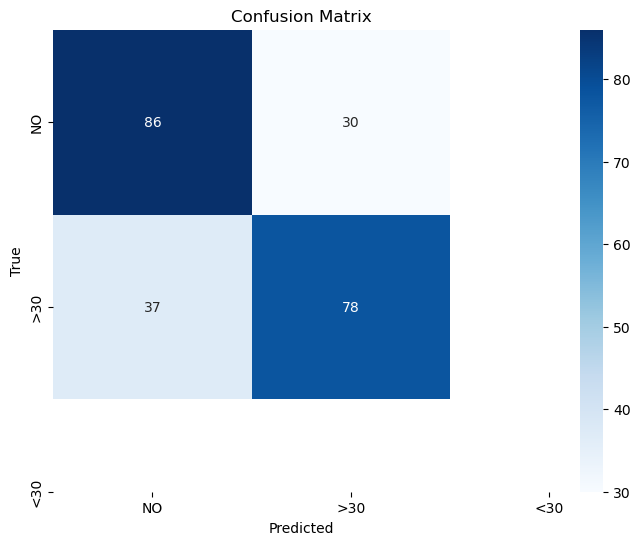

Precision of the MLP :	0.7107046070460705
Recall of the MLP    :	0.7098200899550224
F1 Score of the Model :	0.7096084207366269
Accuracy Score of the Model :	71.0%


In [39]:
# Evaluation of SVM Classifier
confusion_matrix_and_metrics(y_te, svc_y_pred)

### SVC (Default Hyperparameters / Scaled Data)

In [40]:
# SVM Classifier with Scaled Data
svc_model_scaled = SVC()
svc_model_scaled.fit(x_tr_scaled, y_tr)
svc_y_pred_scaled = svc_model_scaled.predict(x_te_scaled)

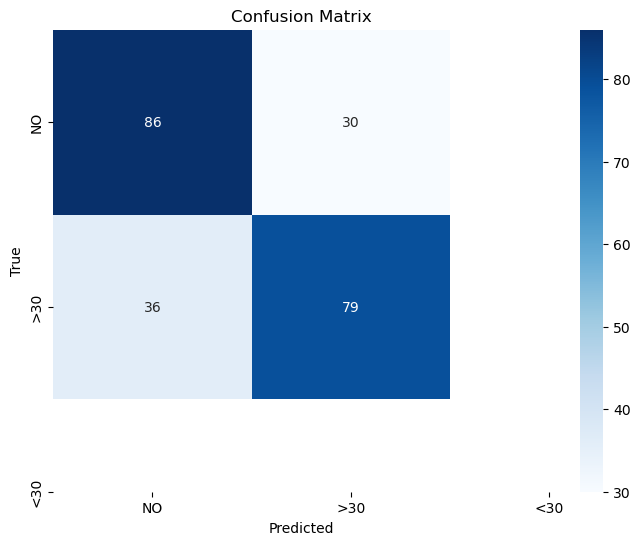

Precision of the MLP :	0.71484433749436
Recall of the MLP    :	0.714167916041979
F1 Score of the Model :	0.7140231092436975
Accuracy Score of the Model :	71.43%


In [41]:
# Evaluation of SVM Classifier with Scaled Data
confusion_matrix_and_metrics(y_te, svc_y_pred_scaled)

### SVC (Tuned Hyperparameters / Unscaled Data)

In [42]:
# Create a model and use Grid Search to find best combination of hyperparameters
svc_model_tuned = SVC()
svc_params = {"kernel": ["linear", "poly", "rbf", "sigmoid"], 
            "degree": [0, 1, 2], 
            "gamma": ["scale", "auto"], 
            "C": [0.001, 0.01, 0.1]}

svc_model_tuned = GridSearchCV(svc_model_tuned, svc_params, verbose=3)
svc_model_tuned.fit(x_tr, y_tr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.674 total time=   0.0s
[CV 2/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.663 total time=   0.0s
[CV 3/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.723 total time=   0.0s
[CV 5/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.543 total time=   0.0s
[CV 2/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 1/5] END C=0.001, degree

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1], 'degree': [0, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [51]:
# SVM Classifier with Tuned Hyperparameters
svc_model_tuned = SVC(C=0.1, kernel="linear")
svc_model_tuned.fit(x_tr, y_tr)
svc_y_pred_tuned = svc_model_tuned.predict(x_te)

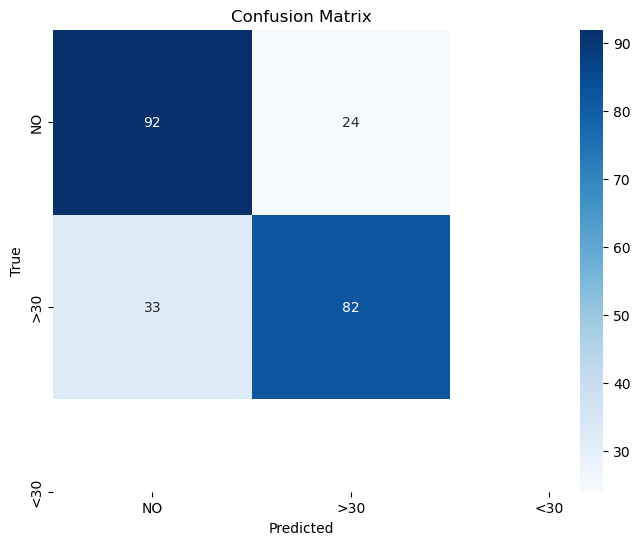

Precision of the MLP :	0.7547924528301887
Recall of the MLP    :	0.7530734632683658
F1 Score of the Model :	0.7527834625711121
Accuracy Score of the Model :	75.32%


In [52]:
# Evaluation of SVM Classifier with Tuned Hyperparameters
confusion_matrix_and_metrics(y_te, svc_y_pred_tuned)

### SVC (Tuned Hyperparameters / Scaled Data)

In [45]:
# Create a model and use Grid Search to find best combination of hyperparameters
svc_model_tuned_scaled = SVC()
svc_params = {"kernel": ["linear", "poly", "rbf", "sigmoid"], 
            "degree": [0, 1, 2, 3, 6], 
            "gamma": ["scale", "auto"], 
            "C": [0.001, 0.01, 0.1, 1, 10, 100]}

svc_model_tuned_scaled = GridSearchCV(svc_model_tuned, svc_params, verbose=3)
svc_model_tuned_scaled.fit(x_tr_scaled, y_tr)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.538 total time=   0.0s
[CV 2/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.565 total time=   0.0s
[CV 3/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.543 total time=   0.0s
[CV 4/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.554 total time=   0.0s
[CV 5/5] END C=0.001, degree=0, gamma=scale, kernel=linear;, score=0.543 total time=   0.0s
[CV 1/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.543 total time=   0.0s
[CV 2/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 4/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 5/5] END C=0.001, degree=0, gamma=scale, kernel=poly;, score=0.538 total time=   0.0s
[CV 1/5] END C=0.001, degr

GridSearchCV(estimator=SVC(C=0.01, degree=0, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [0, 1, 2, 3, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [53]:
# SVM Classifier with Tuned Hyperparameters
svc_model_tuned_scaled = SVC(C=100, degree=0, kernel="linear")
svc_model_tuned_scaled.fit(x_tr_scaled, y_tr)
svc_y_pred_tuned_scaled = svc_model_tuned_scaled.predict(x_te_scaled)

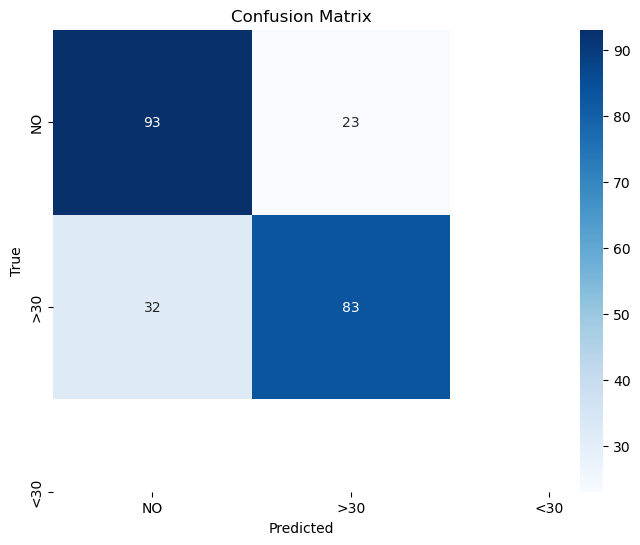

Precision of the MLP :	0.7635094339622641
Recall of the MLP    :	0.7617316341829086
F1 Score of the Model :	0.7614577270423011
Accuracy Score of the Model :	76.19%


In [54]:
# Evaluation of SVM Classifier with Tuned Hyperparameters
confusion_matrix_and_metrics(y_te, svc_y_pred_tuned_scaled)

## Model Comparison

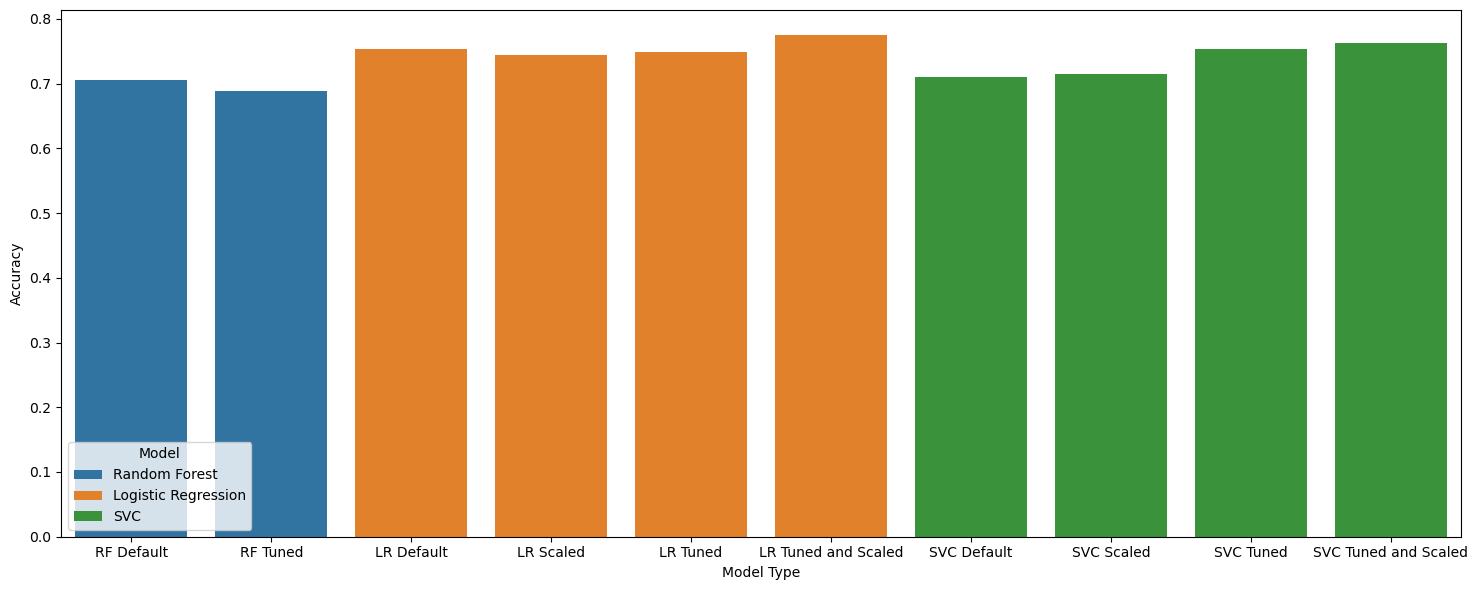

In [55]:
model_type = ["RF Default", 
          "RF Tuned", 
          "LR Default", 
          "LR Scaled", 
          "LR Tuned", 
          "LR Tuned and Scaled", 
          "SVC Default",
          "SVC Scaled", 
          "SVC Tuned", 
          "SVC Tuned and Scaled"]

accuracies = [accuracy_score(y_te, rf_y_pred), 
              accuracy_score(y_te, rf_y_pred_tuned), 
              accuracy_score(y_te, lr_y_pred), 
              accuracy_score(y_te, lr_y_pred_scaled), 
              accuracy_score(y_te, lr_y_pred_tuned), 
              accuracy_score(y_te, lr_y_pred_tuned_scaled), 
              accuracy_score(y_te, svc_y_pred), 
              accuracy_score(y_te, svc_y_pred_scaled), 
              accuracy_score(y_te, svc_y_pred_tuned), 
              accuracy_score(y_te, svc_y_pred_tuned_scaled)]

models = ["Random Forest", "Random Forest", 
          "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
          "SVC", "SVC", "SVC", "SVC"]

comparison_data = pd.DataFrame({"Model Type": model_type, "Accuracy": accuracies, "Model": models})

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="Model Type", y="Accuracy", data=comparison_data, hue="Model", ax=ax)
sns.move_legend(ax, "lower left")
plt.tight_layout()
plt.show()

## Discussion

All three models achieve similar performances ranging from 68% to 78%. I mainly experimented with the effects of scaling data i.e. formating the data with mean 0 and standard deviation of 1. Models trained with scaled data had mix results with Logistic Regression and SVC both having minor and large improvements to accuracy. I also included Grid Search to view the effects of fining tuning the hyperparameters on each model. Random Forest and Logistic Regression experienced a decrease in model accuracy with fine tuned hyperparameters while SVC saw a large improvement in accuracy. With both scaled data and fine tuned hyperparameters, Logistic Regression and SVC performed significantly better then their default counterparts. This proves that scaling and fine tuning are both vital to a models performance with having both leading to an overall more accurate model. The highest accuracy achieved was 77% by the scaled and tuned Logistic Regression model.

## References

1. UCI ML Repo
2. Sklearn Logistic Regression Documentation
3. Sklearn Random Forest Documentation
4. Sklearn SVC Documentation
5. Seaborn Heatmap Documentation

https://archive.ics.uci.edu/dataset/329/diabetic+retinopathy+debrecen

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html